┌ Info: Saved animation to c:\Users\Golum\Desktop\iu9-education\optimization-methods\letuchka-25-03-2025\rotation.gif
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\Golum\\Desktop\\iu9-education\\optimization-methods\\letuchka-25-03-2025\\rotation.gif")
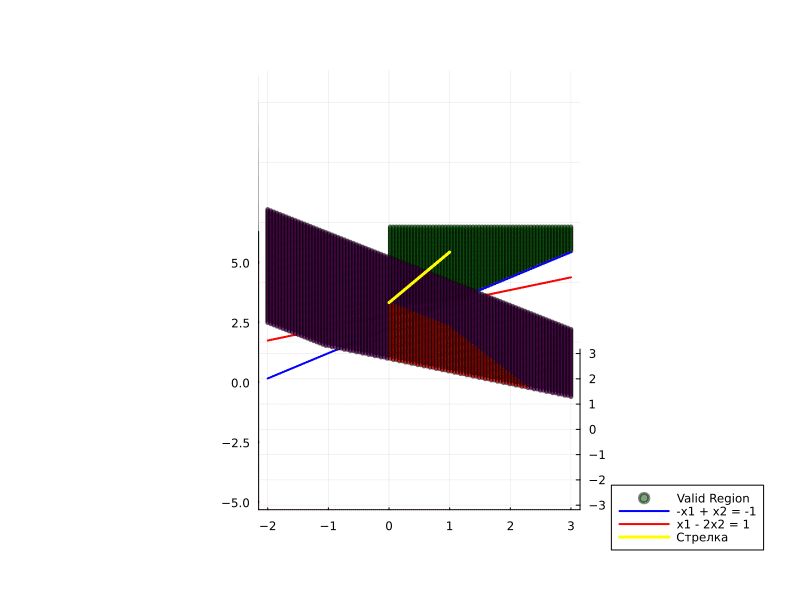

In [ ]:
using Plots
gr()

function region_condition(x1, x2)
    return -x1 + x2 >= -1 && x1 - 2 * x2 <= 1 && x1 >= 0 && x2 >= 0
end

x1_vals = LinRange(-2, 3, 100)
x2_vals = LinRange(-2, 3, 100)

valid_x1 = Float64[]
valid_x2 = Float64[]
valid_z = Float64[]

for x1 in x1_vals
    for x2 in x2_vals
        if region_condition(x1, x2)
            push!(valid_x1, x1)
            push!(valid_x2, x2)
            push!(valid_z, 0)
        end
    end
end

plane_x1 = Float64[]
plane_x2 = Float64[]
plane_z = Float64[]
plane_color = String[]

for x1 in x1_vals
    for x2 in x2_vals
        z = -x1 - 2 * x2
        if z > -5
            push!(plane_x1, x1)
            push!(plane_x2, x2)
            push!(plane_z, z)
            if region_condition(x1, x2)
                push!(plane_color, "red")
            else
                push!(plane_color, "purple")
            end
        end
    end
end

anim = @animate for angle in range(0, stop=360, length=60)
    p = scatter3d(valid_x1, valid_x2, valid_z, 
        label="Valid Region", color=:green, alpha=0.5, strokecolor=:transparent, markersize=2, 
        size=(800, 600), camera=(angle, 30))

    plot!(p, x1_vals, x1_vals .- 1, 0 .* ones(length(x1_vals)), 
        label="-x1 + x2 = -1", color=:blue, linewidth=2)
    plot!(p, x1_vals, (x1_vals .- 1) ./ 2, 0 .* ones(length(x1_vals)), 
        label="x1 - 2x2 = 1", color=:red, linewidth=2)

    scatter3d!(p, plane_x1, plane_x2, plane_z, color=plane_color, alpha=0.5, strokecolor=:transparent, markersize=2, label=false)

    x0, y0, z0 = 0, 0, 0
    x1, y1, z1 = 1, 2, 0
    plot3d!(p, [x0, x1], [y0, y1], [z0, z1], label="Стрелка", color=:yellow, linewidth=3)
end

gif(anim, "rotation.gif", fps=2)